In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import category_encoders as TargetEncoder
from imblearn.over_sampling import  SMOTE
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq,df)
import warnings
warnings.simplefilter(action= 'ignore')

In [2]:
df = pd.read_csv(r'/Users/sot/Downloads/Loan_default.csv')
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [3]:
df = df.drop(['LoanID'],axis = 1)

In [4]:
dff = df.copy()

## SECTION 1:  EXPLORATORY DATA ANALYSIS.

#### It is important to explore your data and understand what is happening in your dataset

<Axes: xlabel='Default', ylabel='count'>

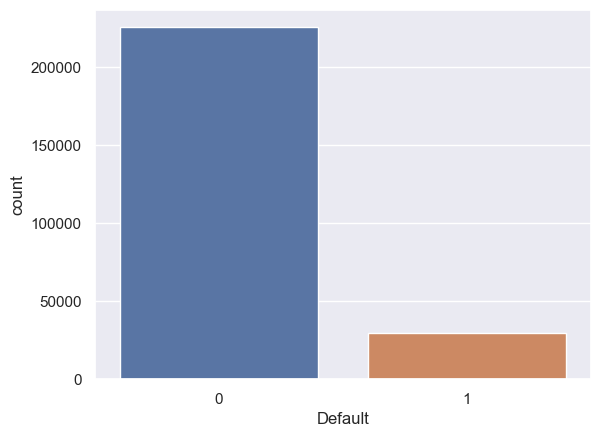

In [5]:
# Since we are trying to predict  loan_status. it is advsiable to create a counplot to visualize our labe

sns.countplot(data = df,x = 'Default')

<Axes: xlabel='LoanAmount'>

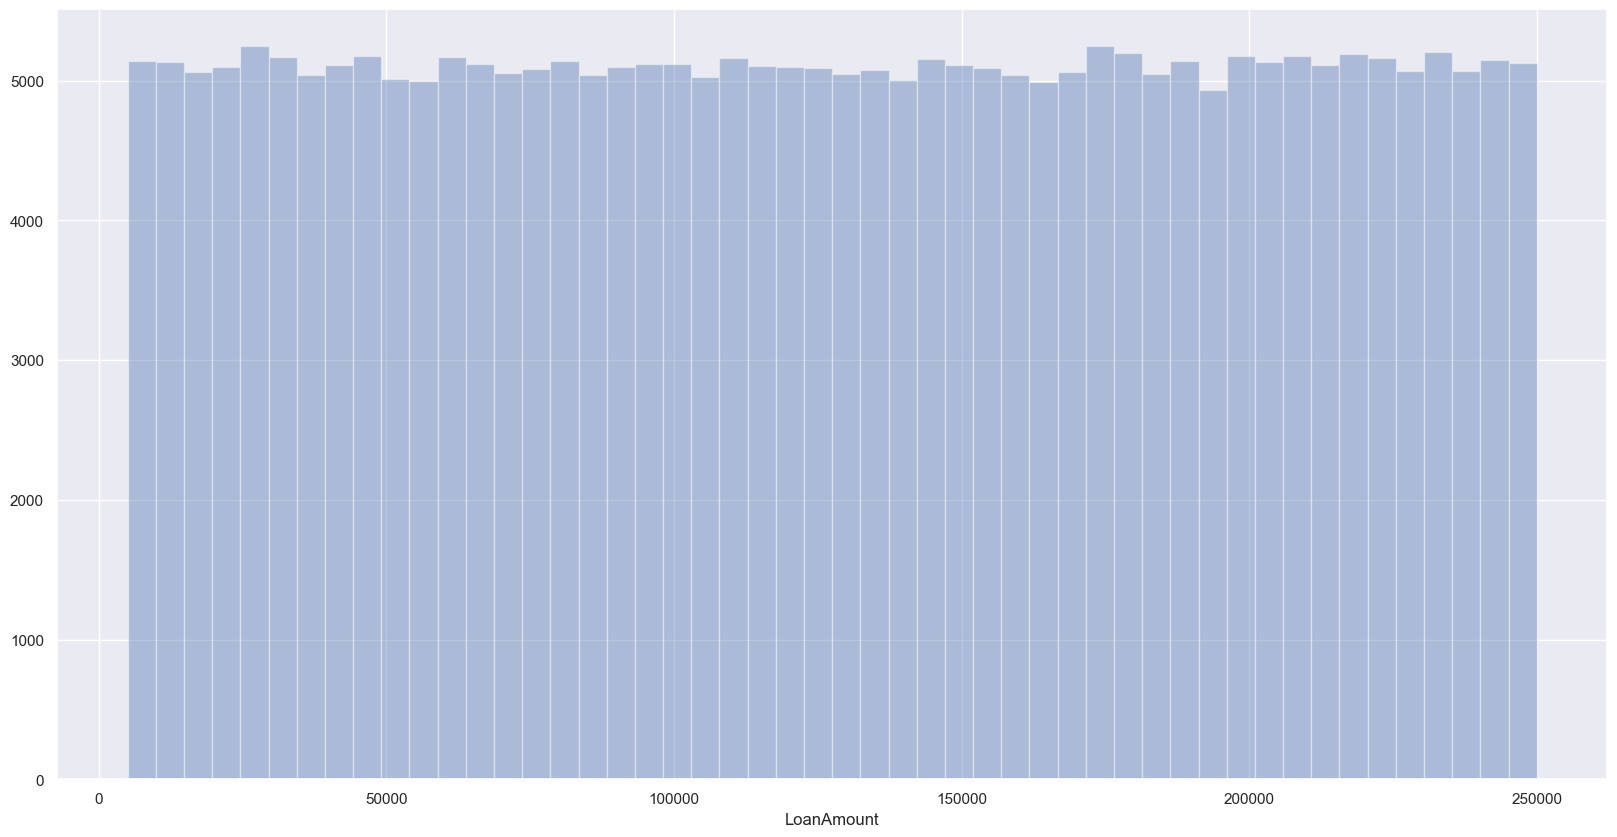

In [6]:
# Creating a histogram for the loan_amount
plt.figure(figsize = (20,10))
sns.distplot(df['LoanAmount'],kde = False)

In [7]:
# lets explore the correlation between the continous feature variables
cols = ['Age','Income','LoanAmount','CreditScore','MonthsEmployed','NumCreditLines','InterestRate','LoanTerm','DTIRatio']

In [8]:
# checking correlation between numeric features

correlation = df[cols].corr()
correlation

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio
Age,1.000000,-0.001244,-0.002213,-0.000548,-0.000341,-0.000890,-0.001127,0.000263,-0.004689
Income,-0.001244,1.000000,-0.000865,-0.001430,0.002675,-0.002016,-0.002303,-0.000998,0.000205
LoanAmount,-0.002213,-0.000865,1.000000,0.001261,0.002817,0.000794,-0.002291,0.002538,0.001122
CreditScore,-0.000548,-0.001430,0.001261,1.000000,0.000613,0.000016,0.000436,0.001130,-0.001039
MonthsEmployed,-0.000341,0.002675,0.002817,0.000613,1.000000,0.001267,0.000096,-0.001166,0.001765
NumCreditLines,-0.000890,-0.002016,0.000794,0.000016,0.001267,1.000000,-0.000297,-0.000226,-0.000586
InterestRate,-0.001127,-0.002303,-0.002291,0.000436,0.000096,-0.000297,1.000000,0.000892,0.000575
LoanTerm,0.000263,-0.000998,0.002538,0.001130,-0.001166,-0.000226,0.000892,1.000000,0.002273
DTIRatio,-0.004689,0.000205,0.001122,-0.001039,0.001765,-0.000586,0.000575,0.002273,1.000000


<Axes: >

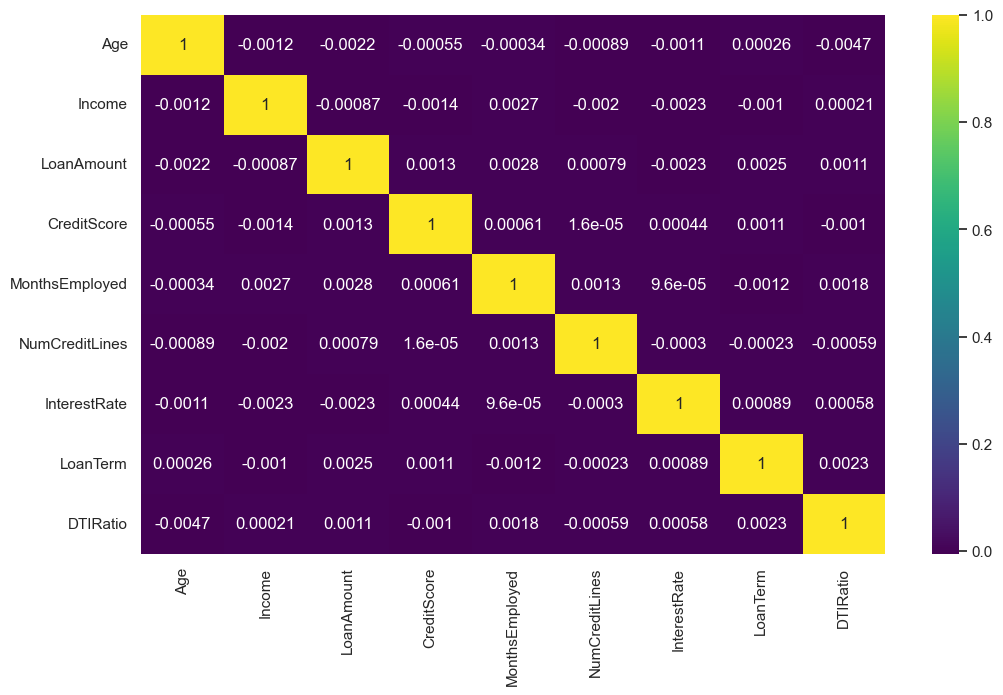

In [9]:
# visualize it using a heatmap
plt.figure(figsize=(12,7))

sns.heatmap(correlation,annot = True,cmap= 'viridis')

<Axes: xlabel='Default', ylabel='LoanAmount'>

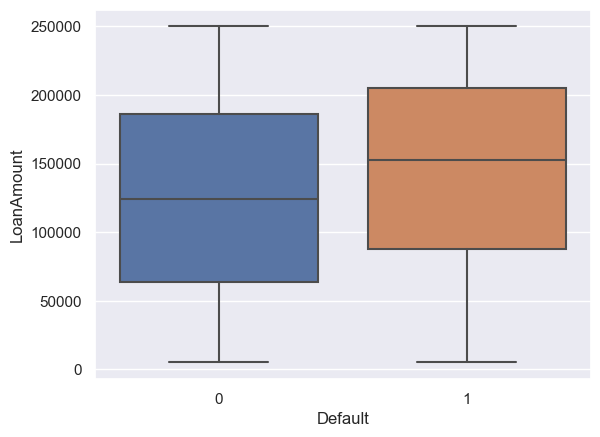

In [10]:
# Let us explore the relationship between DEFAULT AND LOANAMOUNT. let see if loan amount determines if a person will default or not

sns.boxplot(data = df,x='Default',y='LoanAmount')

#### it is evident that the higher the LoanAmount, the more likely that a person will default when given a loan 

In [11]:
# lets calculate the summary statistics for the loan amount, grouped by the default


df.groupby('Default')['LoanAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,225694.0,125353.656017,70708.101479,5001.0,63889.25,124236.0,186177.75,249999.0
1,29653.0,144515.311469,69547.822943,5000.0,88085.00,152672.0,205468.00,249993.0


<Axes: xlabel='Default', ylabel='CreditScore'>

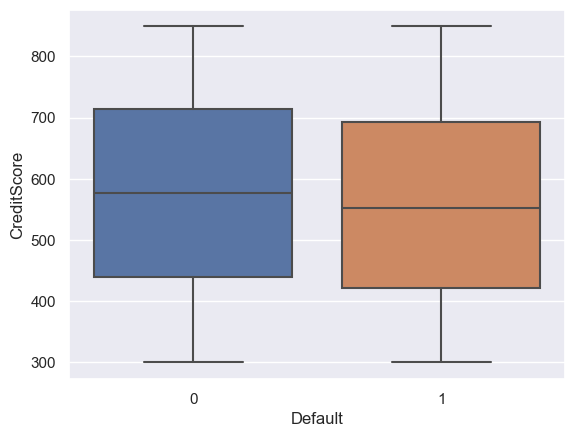

In [12]:
# Let us explore the relationship between DEFAULT AND CREDITSCORE. let's check if credit score determines if a person will default or not

sns.boxplot(data = df,x='Default',y='CreditScore')

In [13]:
# lets calculate the summary statistics for the credit score, grouped by the default


df.groupby('Default')['CreditScore'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,225694.0,576.232270,158.849404,300.0,439.0,577.0,714.0,849.0
1,29653.0,559.286143,158.521855,300.0,421.0,553.0,693.0,849.0


#### credtscore determines very importantly if a person will default or not 

<Axes: xlabel='Default', ylabel='Income'>

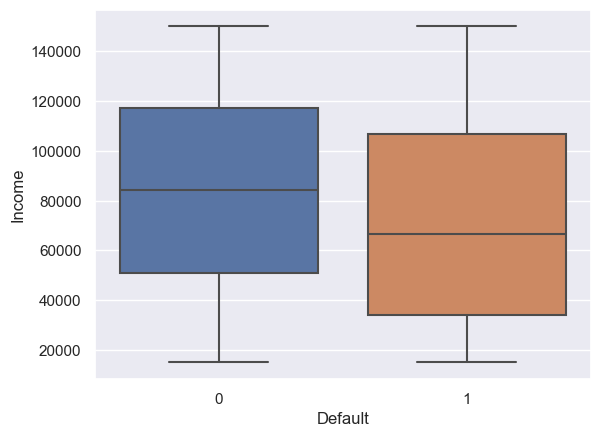

In [14]:
# Let us explore the relationship between DEFAULT AND INCOME. let's  check if INCOME determines if a person will default or not

sns.boxplot(data = df,x='Default',y='Income')

In [15]:
# lets calculate the summary statistics for the income, grouped by the default


df.groupby('Default')['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,225694.0,83899.165995,38498.801232,15000.0,50994.0,84237.5,117186.75,149999.0
1,29653.0,71844.722659,40785.099507,15004.0,34022.0,66566.0,106895.00,149995.0


<Axes: xlabel='Default', ylabel='InterestRate'>

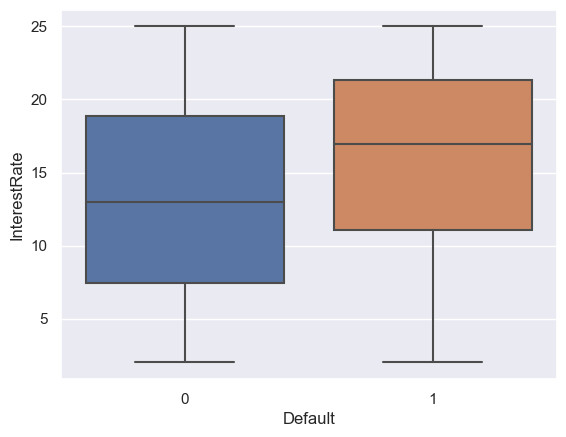

In [16]:
# Let us explore the relationship between DEFAULT AND INTEREST RATE. let check if INTEREST RATE determines if a person will default or not
sns.boxplot(data = df,x='Default',y='InterestRate')

In [17]:
# lets calculate the summary statistics for the interest rate, grouped by the default


df.groupby('Default')['InterestRate'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,225694.0,13.176994,6.612265,2.0,7.45,12.99,18.85,25.0
1,29653.0,15.896227,6.320304,2.0,11.06,16.93,21.36,25.0


#### we could see that interest rate is a point of consideration , the higher the interest rate the likely  that a person will default when given a loan

<Axes: xlabel='Default', ylabel='LoanTerm'>

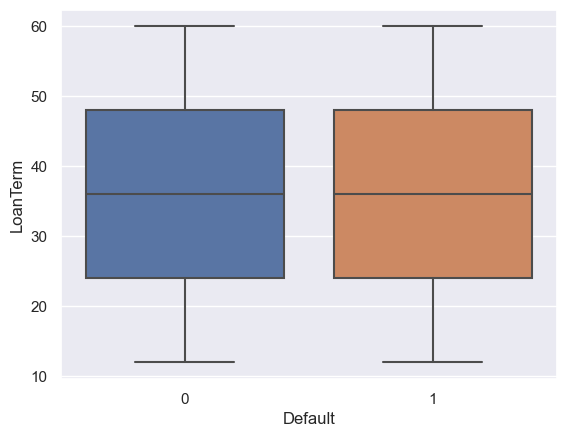

In [18]:
# Let us explore the relationship between DEFAULT AND loan term. let check if loan term determines if a person will default or not

sns.boxplot(data = df,x='Default',y='LoanTerm')

In [19]:
# lets calculate the summary statistics for the Loan term, grouped by the default


df.groupby('Default')['LoanTerm'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,225694.0,36.022544,16.966374,12.0,24.0,36.0,48.0,60.0
1,29653.0,36.051394,16.992077,12.0,24.0,36.0,48.0,60.0


<Axes: xlabel='Default', ylabel='DTIRatio'>

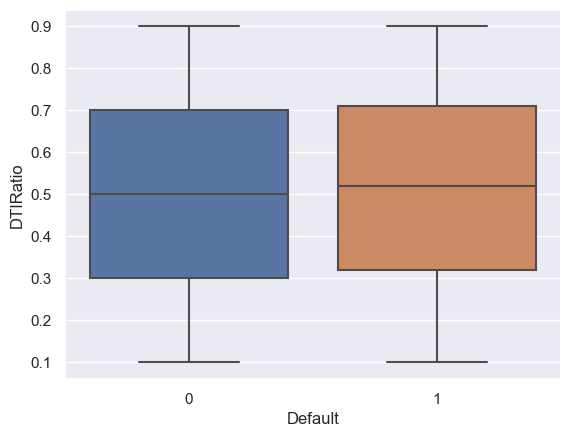

In [20]:
# Let us explore the relationship between DEFAULT AND DTIRatio . let check if DTIRatio  determines if a person will default or not

sns.boxplot(data = df,x='Default',y='DTIRatio')

In [21]:
# lets calculate the summary statistics for the Loan term, grouped by the default


df.groupby('Default')['DTIRatio'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,225694.0,0.498602,0.231099,0.1,0.30,0.50,0.70,0.9
1,29653.0,0.512467,0.229160,0.1,0.32,0.52,0.71,0.9


### EDA ON THE CATEGORICAL DATA

In [22]:
df.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education',
       'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents',
       'LoanPurpose', 'HasCoSigner', 'Default'],
      dtype='object')

<Axes: xlabel='EmploymentType', ylabel='count'>

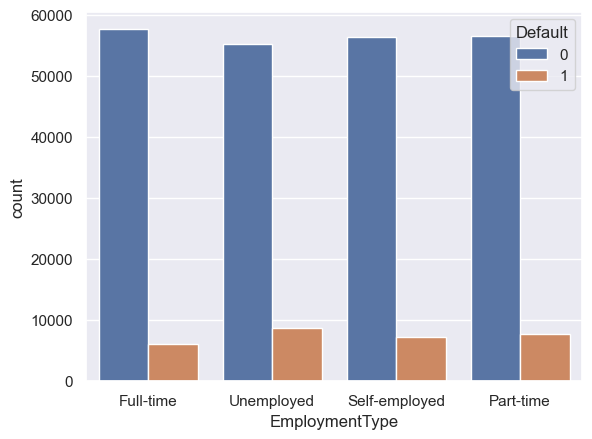

In [23]:

sns.countplot(data = df,x = 'EmploymentType', hue = 'Default')

#### when you look at the countplot of the employmenType  it's somewhat  difficult to tell and differentiate between various employementTypes. Hence,  let us calculate the default ratio to visualize it clearly 

In [24]:
yes_default = df[df['Default']==1].groupby('EmploymentType').count()['Default'] 

In [25]:
no_default = df[df['Default']==0].groupby('EmploymentType').count()['Default']

In [26]:
percentage_default= yes_default / (yes_default+no_default)
percentage_default

EmploymentType
Full-time        0.094634
Part-time        0.119652
Self-employed    0.114620
Unemployed       0.135529
Name: Default, dtype: float64

<Axes: xlabel='EmploymentType'>

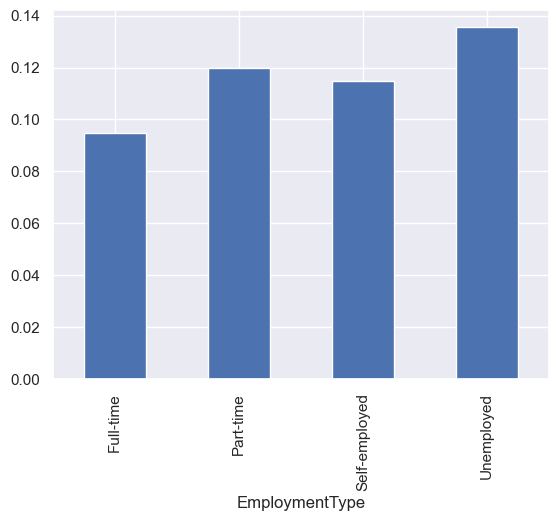

In [27]:
percentage_default .plot(kind = 'bar')

#### it is clearer  that the unemployed  find it difficult to pay back their loans. which kinda make sense because if you dont have a job how do one  intend to pay for a loan?

<Axes: xlabel='HasMortgage', ylabel='count'>

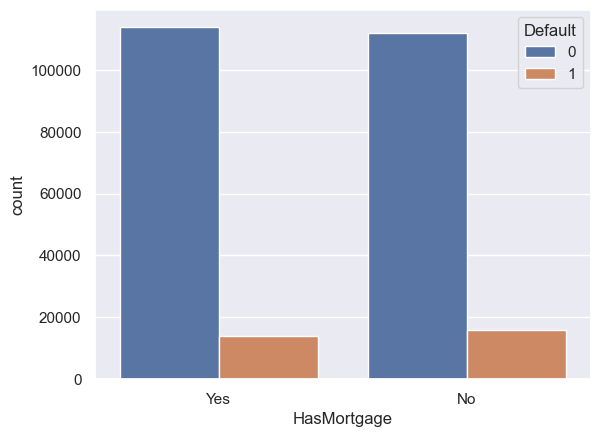

In [28]:
sns.countplot(data = df,x = 'HasMortgage', hue = 'Default')

## RATIO OF DEFAULT IN HASMORTAGE

In [29]:
HasMortgage_yes_default = df[df['Default']==1].groupby('HasMortgage').count()['Default']
HasMortgage_no_default = df[df['Default']==0].groupby('HasMortgage').count()['Default']
percentage_mortage_default= HasMortgage_yes_default/ (HasMortgage_yes_default+HasMortgage_no_default)
percentage_mortage_default

HasMortgage
No     0.123451
Yes    0.108806
Name: Default, dtype: float64

<Axes: xlabel='HasMortgage'>

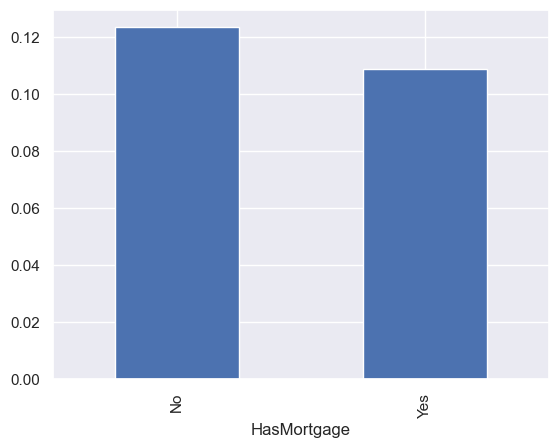

In [30]:
percentage_mortage_default.plot(kind = 'bar')

<Axes: xlabel='MaritalStatus', ylabel='count'>

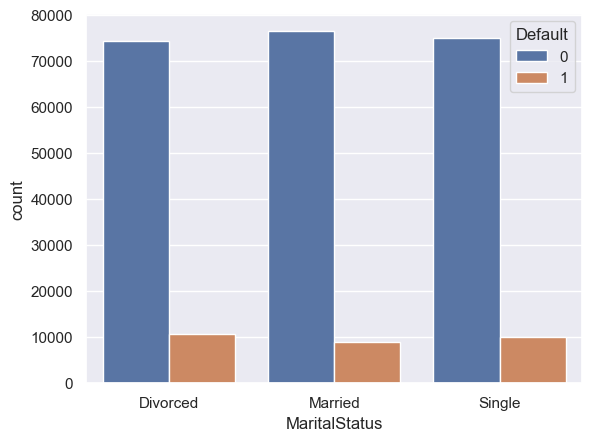

In [31]:
sns.countplot(data = df,x = 'MaritalStatus', hue = 'Default')

## RATIO OF DEFAULT IN MARITAL STATUS

In [32]:
marital_status_yes_default = df[df['Default']==1].groupby('MaritalStatus').count()['Default']
marital_status_no_default = df[df['Default']==0].groupby('MaritalStatus').count()['Default']
percentage_marital_status_default= marital_status_yes_default/ (marital_status_yes_default+marital_status_no_default)
percentage_marital_status_default

MaritalStatus
Divorced    0.125328
Married     0.103972
Single      0.119124
Name: Default, dtype: float64

<Axes: xlabel='MaritalStatus'>

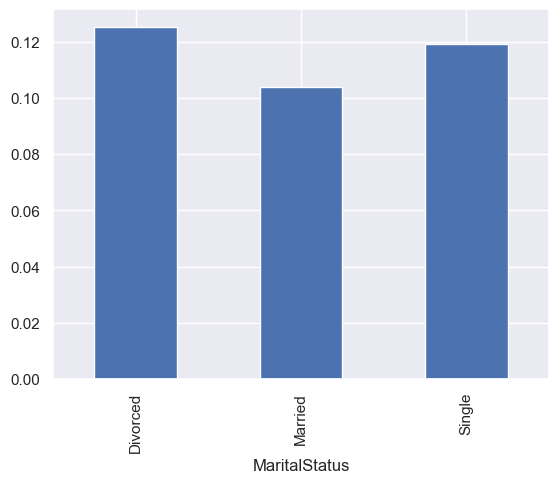

In [33]:
percentage_marital_status_default.plot(kind = 'bar')

<Axes: xlabel='LoanPurpose', ylabel='count'>

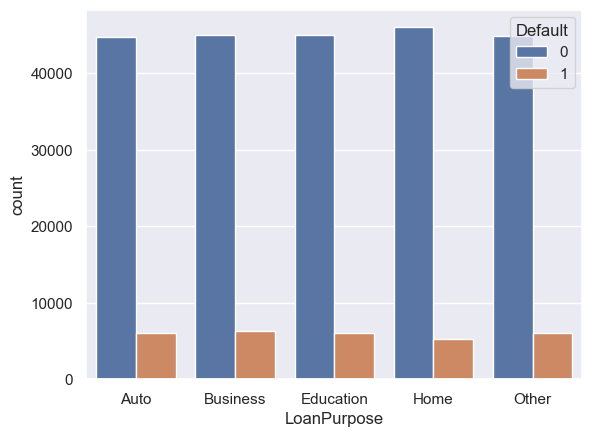

In [34]:
loan_purpose_order = sorted(df['LoanPurpose'].unique())

# i sorted the loanpurpurse in ascending order

sns.countplot(data = df,x = 'LoanPurpose', hue = 'Default',
              order = loan_purpose_order)

## RATIO OF DEFAULT IN LOAN PURPOSE

In [35]:
LoanPurpose_yes_default = df[df['Default']==1].groupby('LoanPurpose').count()['Default']
LoanPurpose_no_default = df[df['Default']==0].groupby('LoanPurpose').count()['Default']
percentage_LoanPurpose_default= LoanPurpose_yes_default/ (LoanPurpose_yes_default+LoanPurpose_no_default)
percentage_LoanPurpose_default

LoanPurpose
Auto         0.118814
Business     0.123260
Education    0.118381
Home         0.102348
Other        0.117885
Name: Default, dtype: float64

<Axes: xlabel='LoanPurpose'>

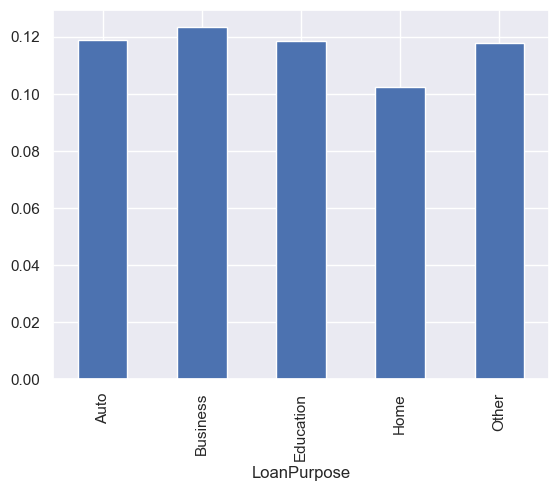

In [36]:
percentage_LoanPurpose_default.plot(kind = 'bar')

<Axes: xlabel='Education', ylabel='count'>

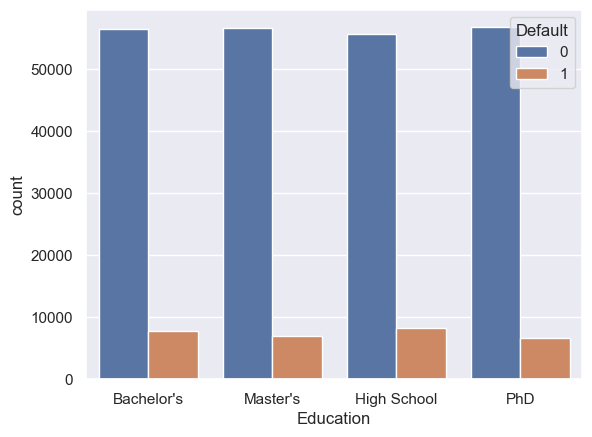

In [37]:

sns.countplot(data = df,x = 'Education', hue = 'Default')

## RATIO OF DEFAULT IN EDUCATION

In [38]:

Education_yes_default = df[df['Default']==1].groupby('Education').count()['Default']
Education_no_default = df[df['Default']==0].groupby('Education').count()['Default']
percentage_Education_default= Education_yes_default/ (Education_yes_default+Education_no_default)
percentage_Education_default

Education
Bachelor's     0.121011
High School    0.128789
Master's       0.108717
PhD            0.105860
Name: Default, dtype: float64

<Axes: xlabel='Education'>

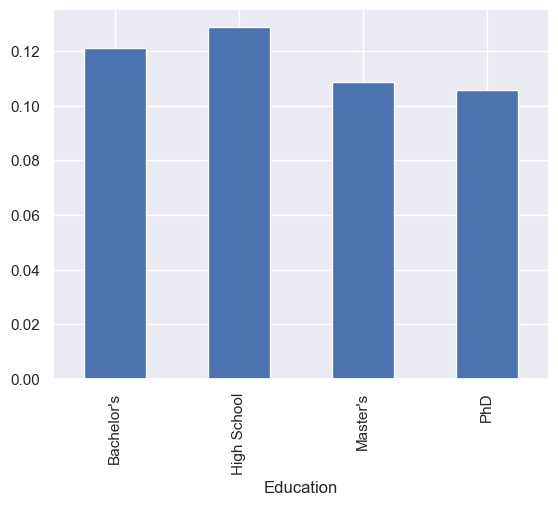

In [39]:
percentage_Education_default.plot(kind = 'bar')

<Axes: xlabel='HasCoSigner', ylabel='count'>

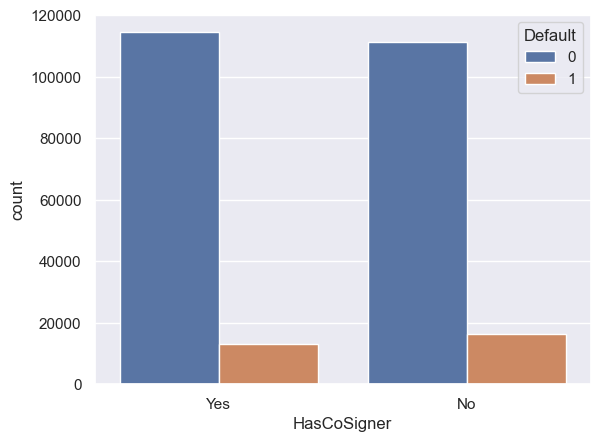

In [40]:
sns.countplot(data = df,x = 'HasCoSigner', hue = 'Default')

## RATIO OF DEFAULT IN HAS COSIGNER

In [41]:

HasCoSigner_yes_default = df[df['Default']==1].groupby('HasCoSigner').count()['Default']
HasCoSigner_no_default = df[df['Default']==0].groupby('HasCoSigner').count()['Default']
percentage_HasCoSigner_default= HasCoSigner_yes_default/ (HasCoSigner_yes_default+HasCoSigner_no_default)
percentage_HasCoSigner_default

HasCoSigner
No     0.128661
Yes    0.103601
Name: Default, dtype: float64

<Axes: xlabel='HasCoSigner'>

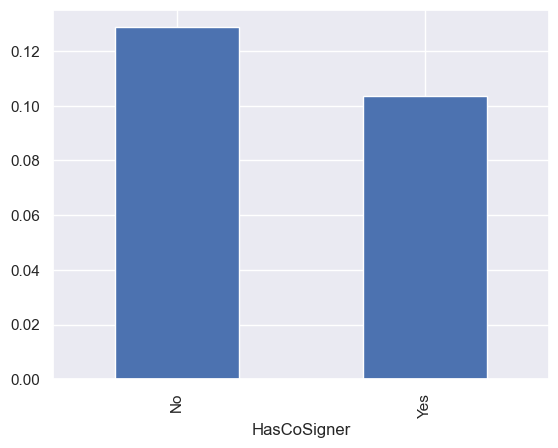

In [42]:
percentage_HasCoSigner_default.plot(kind = 'bar')

In [43]:
# lets explore the correlation between the continous feature variables
colss = ['Age','Income','LoanAmount','CreditScore','MonthsEmployed','NumCreditLines','InterestRate','LoanTerm','DTIRatio','Default']

<Axes: >

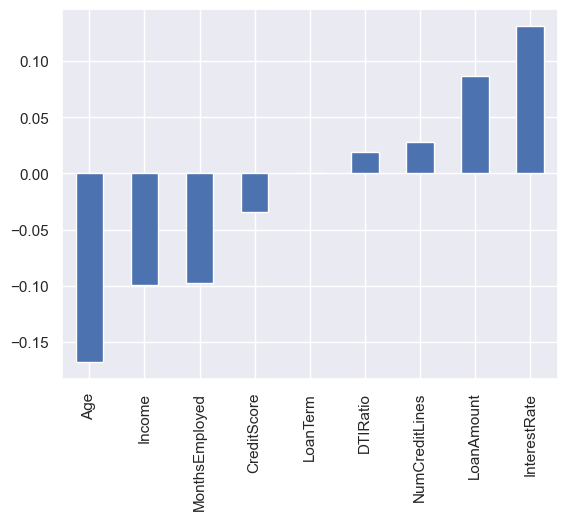

In [44]:
## create the correlation betweeen the numerical features and label

df[colss].corr()['Default'].sort_values().drop('Default').plot(kind ='bar')

## from the correlation we see that age and interest rate have higher correlation, which kinda make sense because when a person's age will determine if he can pay a loan or not and also the when interest rate is high it could determine if a person will default or not

# SECTION 2: Data preprocessing

#### Dealing with missing data

In [45]:
# check my length of the dataframe

len(df)

255347

In [46]:

df.shape

(255347, 17)

In [47]:
## OBSERVE THE SUMMARY STATISTICS OF THE NUMERICAL COLUMNS
df[cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,255347.0,43.498306,14.990258,18.0,31.00,43.00,56.00,69.0
Income,255347.0,82499.304597,38963.013729,15000.0,48825.50,82466.00,116219.00,149999.0
LoanAmount,255347.0,127578.865512,70840.706142,5000.0,66156.00,127556.00,188985.00,249999.0
CreditScore,255347.0,574.264346,158.903867,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,255347.0,59.541976,34.643376,0.0,30.00,60.00,90.00,119.0
NumCreditLines,255347.0,2.501036,1.117018,1.0,2.00,2.00,3.00,4.0
InterestRate,255347.0,13.492773,6.636443,2.0,7.77,13.46,19.25,25.0
LoanTerm,255347.0,36.025894,16.969330,12.0,24.00,36.00,48.00,60.0
DTIRatio,255347.0,0.500212,0.230917,0.1,0.30,0.50,0.70,0.9


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   MonthsEmployed  255347 non-null  int64  
 5   NumCreditLines  255347 non-null  int64  
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  int64  
 8   DTIRatio        255347 non-null  float64
 9   Education       255347 non-null  object 
 10  EmploymentType  255347 non-null  object 
 11  MaritalStatus   255347 non-null  object 
 12  HasMortgage     255347 non-null  object 
 13  HasDependents   255347 non-null  object 
 14  LoanPurpose     255347 non-null  object 
 15  HasCoSigner     255347 non-null  object 
 16  Default         255347 non-null  int64  
dtypes: float64

#### make sure to always multiply the sum of null values / by the len(df)  with 100 to get the percentage of missing rows in order to know what to do either to drop or fillna

In [49]:
df.isnull().sum()

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

#### This is good given that  we dont have any null value in our data. Note that, if we have nulls  we are going to perform any of the following operations or both of the operations depending on the situation:
#### 1. drop the rows or columns with the missing data|
 ####    2. fill the row or columns with missing data with 0 or the mean of any highly correlated feature that has the missing row 

In [50]:
# check for duplicate 
df.duplicated().sum()

0

### checking for outliers in the numerical columns

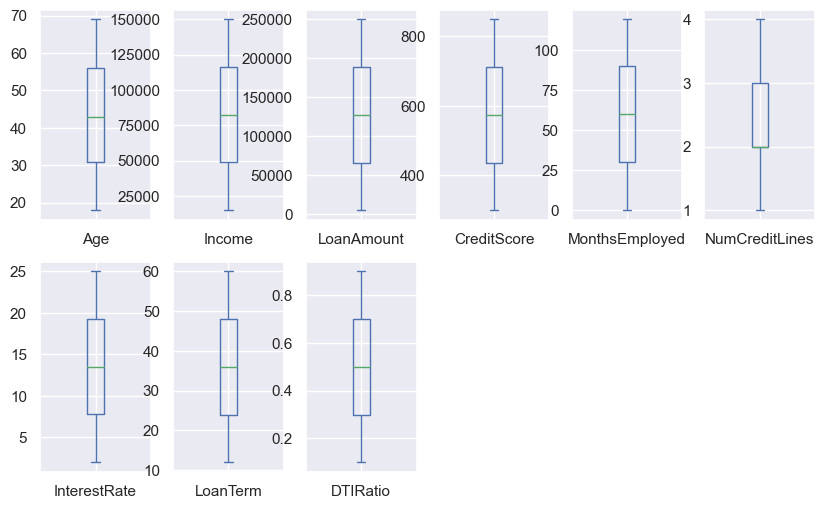

In [51]:
colls = ['Age','Income','LoanAmount','CreditScore','MonthsEmployed','NumCreditLines','InterestRate','LoanTerm','DTIRatio']

df[colls].plot(
     kind = 'box',
    subplots = True,
    figsize =(10,6),
    layout = (2,6) 
);
    

### Now work on the categorical features

In [52]:
df.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education',
       'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents',
       'LoanPurpose', 'HasCoSigner', 'Default'],
      dtype='object')

In [53]:
df['Education'].value_counts()

Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64

In [55]:
### NOW LET US SET X AND Y TO  LABEL AND FEATURE


X = df.drop(['Default'],axis = 1)
y = df['Default']

#### train-test-split, reset index, feature scale on x_train, x_test to avoid data leakage

In [56]:
X_train, X_first_test, y_train, y_first_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [57]:
X_val, X_test, y_val, y_test = train_test_split(X_first_test, y_first_test, test_size=0.6, random_state=42)

#### since i'll be introducing hyperparameters to my model, it is only right to split my data into train , validation and test, so i can use the validation set to tune  the model for the better and perform final evaluation with the test dataset. 

In [58]:
X_train.reset_index(inplace = True)


In [59]:
X_train.drop('index',axis = 1,inplace = True)

In [60]:
X_test.reset_index(inplace = True)

In [61]:
X_test.drop('index',axis = 1,inplace = True)

In [62]:
X_val.reset_index(inplace = True)

In [63]:
X_val.drop('index',axis = 1,inplace = True)

### One hot encoding on categorical features

In [64]:
x_train_dummies = pd.get_dummies(X_train, dtype = int, drop_first = True)

In [65]:
x_test_dummies= pd.get_dummies(X_test, dtype = int, drop_first = True)

In [66]:
x_val_dummies= pd.get_dummies(X_val, dtype = int, drop_first = True)

## Normalizing the data with  minmax scaler for both numerical and dummy columns

#####  since MinMax scaling will not affect the values of my dummy variables because The main advantage of the MinMax Scaler is that it preserves the shape of the original distribution while bringing the values within a desired range. hence, i'm free to  scale all my features both numerical and dummy features. 

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train_dummies)

MinMaxScaler()

In [70]:
x_train_scaled= scaler.transform(x_train_dummies)
x_test_scaled = scaler.transform(x_test_dummies)
x_val_scaled = scaler.transform(x_val_dummies)

## Balancing the  Target ( class 1, class 0)

In [71]:
from imblearn.under_sampling import TomekLinks,NearMiss
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.combine import SMOTETomek

def sampler_function(data_x, data_y, sampler = 0, random_state = 42):
    
    if sampler == 0:
        sampler = RandomOverSampler(random_state = random_state)
    elif sampler == 1:
        sampler = TomekLinks()
    elif sampler == 2:
        sampler = SMOTE()
    elif sampler == 3:
        sampler = SMOTETomek()
    else: 
        sampler = NearMiss()
    X_transformed, y_transformed = sampler.fit_resample(data_x, data_y)
    
    print('Original dataset shape:', data_y.shape)
    print('Resample dataset shape:', y_transformed.shape)
    
    return X_transformed, y_transformed

In [72]:
X_train_res, y_train_res = sampler_function(x_train_scaled, y_train,sampler =2)

Original dataset shape: (178742,)
Resample dataset shape: (316026,)


## Building and testing various classification models for my project

# ENSEMBLE METHODS

###### voting classifier

In [73]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Define classifiers
clf1 = LogisticRegression(random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2)],voting='hard')

voting_clf.fit(X_train_res, y_train_res)
y_pred_voting_clf = voting_clf.predict(x_val_scaled)

# Evaluate the model

print(classification_report(y_val,y_pred_voting_clf))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91     27052
           1       0.26      0.23      0.25      3590

    accuracy                           0.83     30642
   macro avg       0.58      0.57      0.58     30642
weighted avg       0.83      0.83      0.83     30642



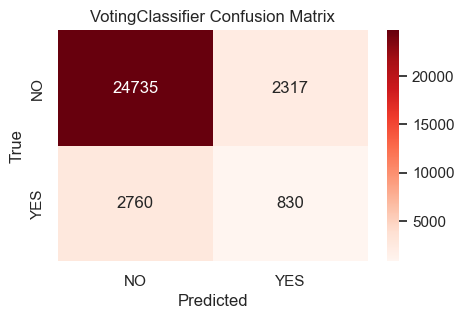

In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val,y_pred_voting_clf)

cm = confusion_matrix(y_val, y_pred_voting_clf)
cm = cm.reshape((2, 2))

# Create heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('VotingClassifier Confusion Matrix')
plt.show()



In [75]:
y_pred_voting_clf = voting_clf.predict(x_test_scaled)

#### Baggging classifier

In [76]:

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Create a BaggingClassifier
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

# Fit the model
bagging_clf.fit(X_train_res, y_train_res)

y_pred_bagging_clf = bagging_clf.predict(x_val_scaled)

print(classification_report(y_val,y_pred_bagging_clf))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     27052
           1       0.38      0.12      0.18      3590

    accuracy                           0.87     30642
   macro avg       0.63      0.55      0.56     30642
weighted avg       0.83      0.87      0.84     30642



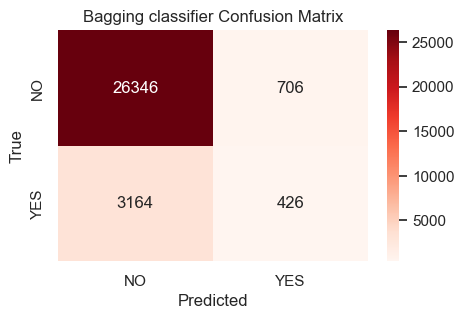

In [77]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val,y_pred_bagging_clf)

cm = confusion_matrix(y_val, y_pred_bagging_clf)
cm = cm.reshape((2, 2))

# Create heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Bagging classifier Confusion Matrix')
plt.show()

In [78]:
y_pred_bagging_clf = bagging_clf.predict(x_test_scaled)

#### Adaboost classifier

In [79]:
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)

# Fit the model
ada_clf.fit(X_train_res, y_train_res)

# Evaluate the model
y_pred_ada_clf = ada_clf.predict(x_val_scaled)

print(classification_report(y_val,y_pred_ada_clf))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91     27052
           1       0.28      0.28      0.28      3590

    accuracy                           0.83     30642
   macro avg       0.59      0.59      0.59     30642
weighted avg       0.83      0.83      0.83     30642



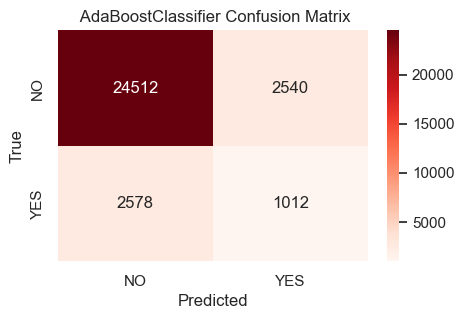

In [80]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val,y_pred_ada_clf)

cm = confusion_matrix(y_val, y_pred_ada_clf)
cm = cm.reshape((2, 2))

# Create heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(' AdaBoostClassifier Confusion Matrix')
plt.show()

In [81]:
y_pred_ada_clf = ada_clf.predict(x_test_scaled)

#### Random forest classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier
class_weights = {0: 1, 1: 3}
# Create a RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, max_depth=20, class_weight=class_weights, random_state=42)

# Fit the model
rfc.fit(X_train_res, y_train_res)

# Evaluate the model

y_pred_rfc = rfc.predict(x_val_scaled)

print(classification_report(y_val,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81     27052
           1       0.21      0.54      0.30      3590

    accuracy                           0.71     30642
   macro avg       0.57      0.63      0.56     30642
weighted avg       0.84      0.71      0.75     30642



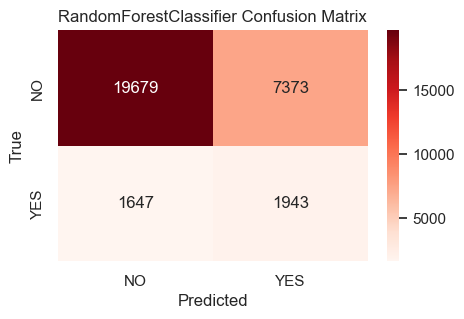

In [83]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val,y_pred_rfc)

cm = confusion_matrix(y_val, y_pred_rfc)
cm = cm.reshape((2, 2))

# Create heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('RandomForestClassifier Confusion Matrix')
plt.show()

In [84]:
y_pred_rfc = rfc.predict(x_test_scaled)

#### Gradient boosting classifier

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the model
gb_clf.fit(X_train_res, y_train_res)

# Evaluate the model

y_pred_gb_clf = gb_clf.predict(x_val_scaled)

print(classification_report(y_val,y_pred_gb_clf))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     27052
           1       0.41      0.15      0.22      3590

    accuracy                           0.88     30642
   macro avg       0.65      0.56      0.57     30642
weighted avg       0.84      0.88      0.85     30642



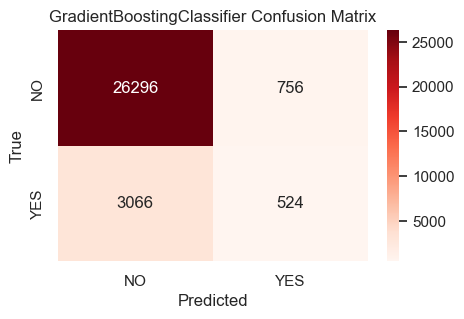

In [86]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val,y_pred_gb_clf)

cm = confusion_matrix(y_val, y_pred_gb_clf)
cm = cm.reshape((2, 2))

# Create heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('GradientBoostingClassifier Confusion Matrix')
plt.show()

In [87]:
y_pred_gb_clf = gb_clf.predict(x_test_scaled)

#### XGboost classifier

In [88]:
from xgboost import XGBClassifier

xg_clf = XGBClassifier(objective='binary:logistic', 
                         eval_metric='logloss', 
                         random_state=42)
# Fit the model

xg_clf.fit(X_train_res, y_train_res)

# Evaluate the model

y_pred_xg_clf = xg_clf.predict(x_val_scaled)

print(classification_report(y_val,y_pred_xg_clf))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     27052
           1       0.50      0.10      0.17      3590

    accuracy                           0.88     30642
   macro avg       0.70      0.54      0.55     30642
weighted avg       0.85      0.88      0.85     30642



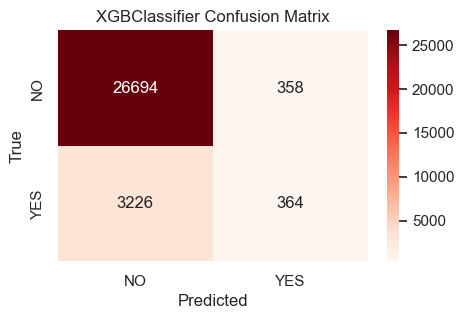

In [89]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val,y_pred_xg_clf)

cm = confusion_matrix(y_val, y_pred_xg_clf)
cm = cm.reshape((2, 2))

# Create heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('XGBClassifier Confusion Matrix')
plt.show()

In [90]:
y_pred_xg_clf = xg_clf.predict(x_test_scaled)

## NAIVE BAYE'S CLASSIFIERS

#### GaussianNB classifer

In [91]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

# Fit the model


gnb.fit(X_train_res, y_train_res)

# Evaluate the model

y_pred_gnb = gnb.predict(x_val_scaled)

print(classification_report(y_val,y_pred_gnb))

              precision    recall  f1-score   support

           0       0.94      0.70      0.80     27052
           1       0.22      0.64      0.33      3590

    accuracy                           0.70     30642
   macro avg       0.58      0.67      0.57     30642
weighted avg       0.85      0.70      0.75     30642



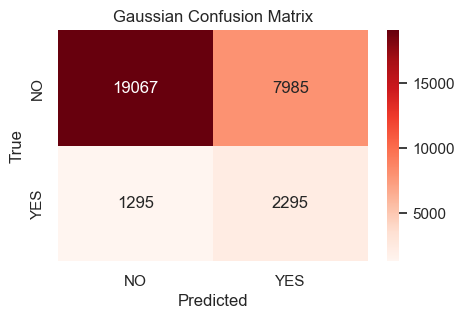

In [92]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val,y_pred_gnb)

cm = confusion_matrix(y_val, y_pred_gnb)
cm = cm.reshape((2, 2))

# Create heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Gaussian Confusion Matrix')
plt.show()

In [93]:

y_pred_gnb = gnb.predict(x_test_scaled)

#### BernoulliNB classifier

In [94]:
from sklearn.naive_bayes import  BernoulliNB

bnb =  BernoulliNB()

# Fit the model

bnb.fit(X_train_res, y_train_res)

# Evaluate the model

y_pred_bnb = bnb.predict(x_val_scaled)

print(classification_report(y_val,y_pred_bnb))

              precision    recall  f1-score   support

           0       0.89      0.50      0.64     27052
           1       0.12      0.53      0.20      3590

    accuracy                           0.50     30642
   macro avg       0.51      0.51      0.42     30642
weighted avg       0.80      0.50      0.59     30642



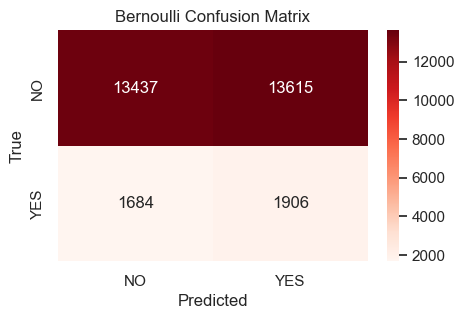

In [95]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val,y_pred_bnb)

cm = confusion_matrix(y_val, y_pred_bnb)
cm = cm.reshape((2, 2))

# Create heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Bernoulli Confusion Matrix')
plt.show()

In [96]:
y_pred_bnb = bnb.predict(x_test_scaled)

####  MultinomialNB classifier

In [97]:
# MultinomialNB fails when features have negative values using the minmax scaler becomes very more significiant than standard scaler

from sklearn.naive_bayes import  MultinomialNB

mnb =  MultinomialNB()

# Fit the model

mnb.fit(X_train_res, y_train_res)

# Evaluate the model

y_pred_mnb = mnb.predict(x_val_scaled)

print(classification_report(y_val,y_pred_mnb))

              precision    recall  f1-score   support

           0       0.93      0.66      0.77     27052
           1       0.20      0.65      0.31      3590

    accuracy                           0.66     30642
   macro avg       0.57      0.65      0.54     30642
weighted avg       0.85      0.66      0.72     30642



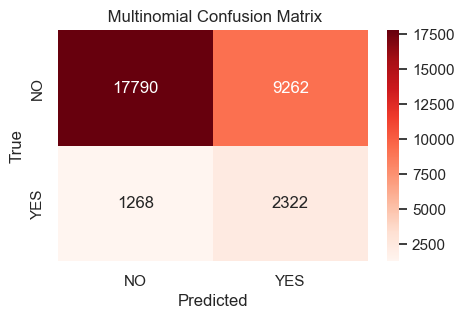

In [98]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val,y_pred_mnb)

cm = confusion_matrix(y_val, y_pred_mnb)
cm = cm.reshape((2, 2))

# Create heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(' Multinomial Confusion Matrix')
plt.show()

In [99]:
y_pred_mnb = mnb.predict(x_test_scaled)

# Neural_network Classification

#### MLPClassifier (Multi-layer Perceptron classifier)

In [100]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', 
                    alpha=0.0001, batch_size='auto', learning_rate='constant', 
                    learning_rate_init=0.001, max_iter=200, shuffle=True, 
                    random_state=42, tol=0.0001, verbose=False, early_stopping=False, 
                    validation_fraction=0.1, n_iter_no_change=10, max_fun=15000)

# Fit the model

mlp.fit(X_train_res, y_train_res)

# Evaluate the model

y_pred_mlp = mlp.predict(x_val_scaled)

print(classification_report(y_val,y_pred_mlp))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85     27052
           1       0.22      0.42      0.29      3590

    accuracy                           0.75     30642
   macro avg       0.56      0.61      0.57     30642
weighted avg       0.83      0.75      0.78     30642



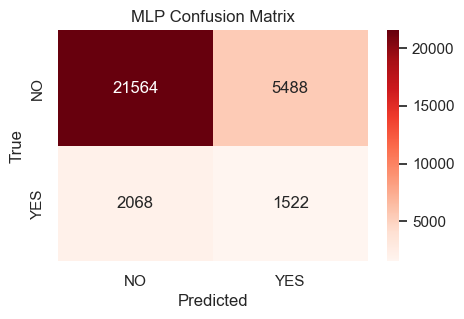

In [101]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val,y_pred_mlp)

cm = confusion_matrix(y_val, y_pred_mlp)
cm = cm.reshape((2, 2))

# Create heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('MLP Confusion Matrix')
plt.show()

In [102]:
y_pred_mlp = mlp.predict(x_test_scaled)

#### Logisitic Regression

In [103]:
from sklearn.linear_model import LogisticRegressionCV

lgr = LogisticRegressionCV(cv =5)

# Fit the model


lgr.fit(X_train_res, y_train_res)

# Evaluate the model

y_pred_lgr = lgr.predict(x_val_scaled)

print(classification_report(y_val,y_pred_lgr))

              precision    recall  f1-score   support

           0       0.94      0.69      0.79     27052
           1       0.22      0.68      0.34      3590

    accuracy                           0.69     30642
   macro avg       0.58      0.68      0.57     30642
weighted avg       0.86      0.69      0.74     30642



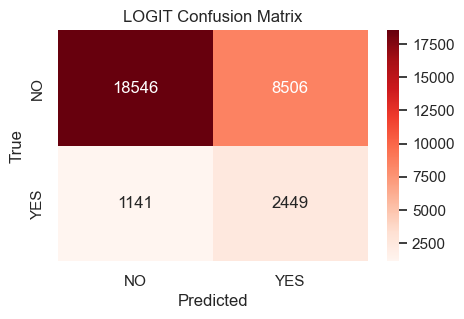

In [104]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val,y_pred_lgr)

cm = confusion_matrix(y_val, y_pred_lgr)
cm = cm.reshape((2, 2))

# Create heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('LOGIT Confusion Matrix')
plt.show()

In [105]:

y_pred_lgr = lgr.predict(x_test_scaled)

### Exploring deeping learning model for  my project

In [143]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential

In [144]:
model = Sequential()

model.add(Dense(24,activation='relu'))
model.add(Dropout(0.3)),
              
model.add(Dense(12,activation='relu'))
model.add(Dropout(0.3)),
              
model.add(Dense(6,activation='relu')),
model.add(Dropout(0.3)),
              
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy',metrics = ['accuracy'])

In [145]:
early_stop = EarlyStopping(monitor = 'val_loss',mode= 'min',verbose = 1, patience = 2)

In [146]:
# Fit the model
model.fit(X_train_res, y_train_res, epochs=10, batch_size=256,validation_data=(x_val_scaled,y_val),callbacks=[early_stop])

Epoch 1/10
1235/1235 ━━━━━━━━━━━━━━━━━━━━ 2s 521us/step - accuracy: 0.5951 - loss: 0.6595 - val_accuracy: 0.7033 - val_loss: 0.5524
Epoch 2/10
1235/1235 ━━━━━━━━━━━━━━━━━━━━ 1s 455us/step - accuracy: 0.6839 - loss: 0.6014 - val_accuracy: 0.6790 - val_loss: 0.5969
Epoch 3/10
1235/1235 ━━━━━━━━━━━━━━━━━━━━ 1s 450us/step - accuracy: 0.6906 - loss: 0.5950 - val_accuracy: 0.7049 - val_loss: 0.5868
Epoch 3: early stopping


In [147]:
metrics= pd.DataFrame(model.history.history)

In [148]:
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.643523,0.631010,0.703348,0.552437
1,0.685700,0.598911,0.678970,0.596939
2,0.693851,0.592547,0.704915,0.586769


<Axes: >

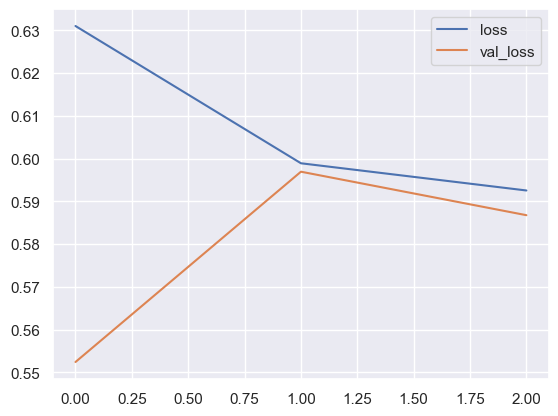

In [149]:
metrics[['loss','val_loss']].plot()

<Axes: >

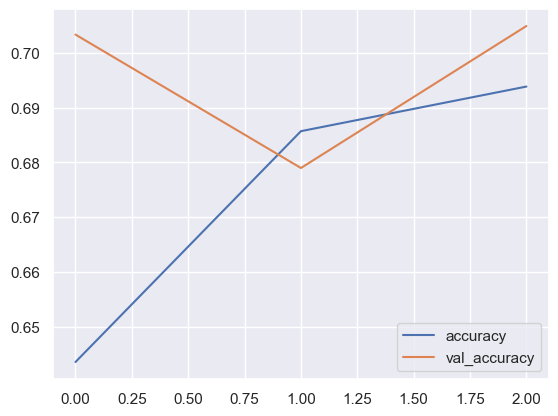

In [150]:
metrics[['accuracy','val_accuracy']].plot()

In [151]:
model.evaluate(x_val_scaled,y_val, verbose = 0)

[0.5867688655853271, 0.7049148082733154]

In [152]:
y_pred_tensor = (model.predict(x_val_scaled) > 0.5).astype("int32")


958/958 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step


In [153]:
print(classification_report(y_val,y_pred_tensor))

              precision    recall  f1-score   support

           0       0.94      0.71      0.81     27052
           1       0.23      0.65      0.34      3590

    accuracy                           0.70     30642
   macro avg       0.58      0.68      0.57     30642
weighted avg       0.86      0.70      0.75     30642



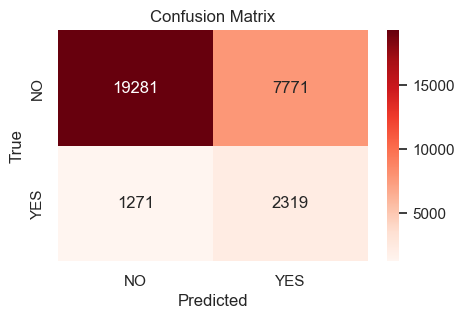

In [154]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred_tensor)
cm = cm.reshape((2, 2))

# Create heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [155]:
y_pred_tensor = (model.predict(x_test_scaled) > 0.5).astype("int32")

1437/1437 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step


# SUMMARY TABLE OF MY MODELS

In [156]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


pred_summary = pd.DataFrame(
{
    'Models':[
        'voting classifier',
        'Baggging classifier',
        'Adaboost classifier',
        'Random forest classifier',
        'Gradient boosting classifier',
        'XGboost classifier',
        'GaussianNB classifer',
        'BernoulliNB classifier',
        'MultinomialNB classifier',
        'Multi-layer Perceptron classifier',
        'Logit Regression',
        'Tensorflow sequential'
    ],
    
    'Accuracy':[
       accuracy_score(y_test,y_pred_voting_clf),
        accuracy_score(y_test, y_pred_bagging_clf),    
         accuracy_score(y_test, y_pred_ada_clf),
        accuracy_score(y_test, y_pred_rfc),  
         accuracy_score(y_test, y_pred_gb_clf),
        accuracy_score(y_test, y_pred_xg_clf),    
         accuracy_score(y_test, y_pred_gnb),
        accuracy_score(y_test, y_pred_bnb),
         accuracy_score(y_test, y_pred_mnb),    
         accuracy_score(y_test, y_pred_mlp),
        accuracy_score(y_test, y_pred_lgr),
         accuracy_score(y_test, y_pred_tensor) 
    ],
    
    'Precision':[
        
        precision_score(y_test,y_pred_voting_clf),
       precision_score(y_test, y_pred_bagging_clf),    
         precision_score(y_test, y_pred_ada_clf),
       precision_score(y_test, y_pred_rfc),  
        precision_score(y_test, y_pred_gb_clf),
       precision_score(y_test, y_pred_xg_clf),    
         precision_score(y_test, y_pred_gnb),
        precision_score(y_test, y_pred_bnb),
        precision_score(y_test, y_pred_mnb),    
         precision_score(y_test, y_pred_mlp),
         precision_score(y_test, y_pred_lgr),
        precision_score(y_test, y_pred_tensor)      
    
    ],
    
    'Recall':[
          recall_score(y_test,y_pred_voting_clf),
      recall_score(y_test, y_pred_bagging_clf),    
        recall_score(y_test, y_pred_ada_clf),
       recall_score(y_test, y_pred_rfc),  
        recall_score(y_test, y_pred_gb_clf),
       recall_score(y_test, y_pred_xg_clf),    
         recall_score(y_test, y_pred_gnb),
        recall_score(y_test, y_pred_bnb),
        recall_score(y_test, y_pred_mnb),    
     recall_score(y_test, y_pred_mlp),
        recall_score(y_test, y_pred_lgr), 
          recall_score(y_test, y_pred_tensor) 
    ],
    
    'F1 Score':
    [
      f1_score(y_test,y_pred_voting_clf),
      f1_score(y_test, y_pred_bagging_clf),    
       f1_score(y_test, y_pred_ada_clf),
     f1_score(y_test, y_pred_rfc),  
        f1_score(y_test, y_pred_gb_clf),
       f1_score(y_test, y_pred_xg_clf),    
         f1_score(y_test, y_pred_gnb),
       f1_score(y_test, y_pred_bnb),
       f1_score(y_test, y_pred_mnb),    
     f1_score(y_test, y_pred_mlp),
        f1_score(y_test, y_pred_lgr), 
          f1_score(y_test, y_pred_tensor) 
    ],       
}
)

In [157]:
pred_summary

,Models,Accuracy,Precision,Recall,F1 Score
0,voting classifier,0.834758,0.261749,0.232846,0.246453
1,Baggging classifier,0.875095,0.380505,0.121485,0.184169
2,Adaboost classifier,0.834758,0.283471,0.277465,0.280436
3,Random forest classifier,0.705089,0.206707,0.543120,0.299447
4,Gradient boosting classifier,0.876379,0.403333,0.136108,0.203532
5,XGboost classifier,0.883493,0.490376,0.100300,0.166537
6,GaussianNB classifer,0.697953,0.220456,0.631984,0.326885
7,BernoulliNB classifier,0.501773,0.123241,0.538620,0.200586
8,MultinomialNB classifier,0.655984,0.199185,0.650356,0.304967
9,Multi-layer Perceptron classifier,0.752410,0.216842,0.434008,0.289194


### INSIGHTS ON THE MODELS AND CONCLUSION OF THE FINAL MODEL FOR DEPLOYMENT 

####  Base on the summary table, it's evident that the models with higher accuracy score are poorly generalizing when it comes to class 1; As such, accuracy score becomes insignificiant in this project, because we want to be able to rate the classification performance of our classification function. Accuracy can be a useful measure if we have the same amount of samples per class but if we have an imbalanced set of samples accuracy isn't useful at all. Moreover, in our case, our class is imbalanced. 

#### Based on model complexity and generalization; logistic Regression seems to capture my attention having a  better generalization for  both classes.  Sequential, MultinomialNB classifier,BernoulliNB classifier and GaussianNB classifer seem very good too for this project. However i'll be deploying the LOGIT model because it is  my best performing model overall

## saving and Preparing my final model, scaler, and columns for deployment

In [121]:
final_model =  LogisticRegressionCV(cv=5)

In [122]:
scaler.fit_transform(x_train_dummies)

array([[0.76470588, 0.64996778, 0.48270767, ..., 0.        , 0.        ,
        0.        ],
       [0.45098039, 0.88648064, 0.05920985, ..., 0.        , 0.        ,
        1.        ],
       [0.07843137, 0.44691442, 0.64115709, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.8627451 , 0.14349736, 0.2230227 , ..., 0.        , 0.        ,
        0.        ],
       [0.50980392, 0.97231831, 0.78960623, ..., 1.        , 0.        ,
        0.        ],
       [0.35294118, 0.6136638 , 0.7493561 , ..., 1.        , 0.        ,
        0.        ]])

In [123]:
final_model.fit(x_train_dummies,y_train)

LogisticRegressionCV(cv=5)

In [124]:
import joblib

In [125]:
joblib.dump(final_model, 'final_model.pk1')

['final_model.pk1']

In [126]:
joblib.dump(scaler, 'final_scaler.pk1')

['final_scaler.pk1']

In [127]:
joblib.dump(list(x_train_dummies.columns),'col_names.pk1')

['col_names.pk1']

## Loading the model,scaler 

In [128]:
loaded_model = joblib.load('final_model.pk1')

In [129]:
loaded_model

LogisticRegressionCV(cv=5)

In [130]:
loaded_scaler = joblib.load('final_scaler.pk1')

In [131]:
loaded_scaler

MinMaxScaler()

In [132]:
new_columns = joblib.load('col_names.pk1')

In [133]:
new_columns

['Age',
 'Income',
 'LoanAmount',
 'CreditScore',
 'MonthsEmployed',
 'NumCreditLines',
 'InterestRate',
 'LoanTerm',
 'DTIRatio',
 'Education_High School',
 "Education_Master's",
 'Education_PhD',
 'EmploymentType_Part-time',
 'EmploymentType_Self-employed',
 'EmploymentType_Unemployed',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'HasMortgage_Yes',
 'HasDependents_Yes',
 'LoanPurpose_Business',
 'LoanPurpose_Education',
 'LoanPurpose_Home',
 'LoanPurpose_Other',
 'HasCoSigner_Yes']

#####  Confirming the folder location of my loaded model, scaler and columns

In [134]:
import os
filepath = '/Users/sot/final_scaler.pk1'
if os.path.exists(filepath):
    file = open('/Users/sot/final_scaler.pk1')
    #codedata = pickle.load(file)
    file.close()
else:
    print("File not present at desired location")

In [135]:
import os
filepath = '/Users/sot/final_model.pk1'
if os.path.exists(filepath):
    file = open('/Users/sot/final_model.pk1')
    #codedata = pickle.load(file)
    file.close()
else:
    print("File not present at desired location")

In [136]:
import os
filepath = '/Users/sot/col_names.pk1'
if os.path.exists(filepath):
    file = open('/Users/sot/col_names.pk1')
    #codedata = pickle.load(file)
    file.close()
else:
    print("File not present at desired location")

##### Below is the code for my FLASK API. i'll be  testing the API with POSTMAN  and also make use of  python to make request. kindly check the code below 

In [ ]:
from flask import Flask, request, jsonify
import numpy as np
import joblib
import pandas as pd

app = Flask(__name__)

@app.route('/loan_prediction', methods=['POST'])
def predict():
    try:
        feat_data = request.json
        df = pd.DataFrame(feat_data)
        df = pd.get_dummies(df, drop_first= True)
        df = df.reindex(columns=col_names, fill_value=0)  
         
        df = scaler.transform(df)
        prediction = list(model.predict(df))

        return jsonify({'prediction': str(prediction)})
    except Exception as e:
        return jsonify({'error': str(e)}),

if __name__ == '__main__':
    model = joblib.load("/Users/sot/final_model.pk1")  
    col_names = joblib.load('/Users/sot/col_names.pk1') 
    scaler =    joblib.load('final_scaler.pk1')                 


    app.run(debug=True)

In [137]:
dff.head(3)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1


In [138]:
dff.iloc[2]

Age                       46
Income                 84208
LoanAmount            129188
CreditScore              451
MonthsEmployed            26
NumCreditLines             3
InterestRate           21.17
LoanTerm                  24
DTIRatio                0.31
Education           Master's
EmploymentType    Unemployed
MaritalStatus       Divorced
HasMortgage              Yes
HasDependents            Yes
LoanPurpose             Auto
HasCoSigner               No
Default                    1
Name: 2, dtype: object

#### using the above details to test my FLASK API with python get request functionality. kindly  note that my API is currently running behind the sense. 

In [142]:
import requests

url = 'http://127.0.0.1:5000/loan_prediction'

loan_data = [{
    "Age": 46,
    "Income": 84208,
    "LoanAmount": 129188,
    "CreditScore": 451,
    "MonthsEmployed": 26,
    "NumCreditLines": 3,
    "InterestRate": 21.17,
    "LoanTerm": 24,
    "DTIRatio": 0.31,
    "Education": "Master's",
    "EmploymentType": "Unemployed",
    "MaritalStatus": "Divorced",
    "HasMortgage": "Yes",
    "HasDependents": "Yes",
    "LoanPurpose": "Auto",
    "HasCoSigner": "No"
}]

headers = {'Content-Type': 'application/json'}
response = requests.post(url, json= loan_data, headers=headers)

print(response.json())

{'prediction': '[1]'}
